In [148]:
import numpy as np
import matplotlib
import random
import re
from math import *
from pylab import *

def Htrue(x):
    return cos(2*pi*x)

def wi():
    return np.random.normal(0,0.01) 

def yi(x):
    return Htrue(x) + wi(); 

In [154]:
Lambda = [  0.0000000001, 0.0000000002, 0.0000000003, 0.0000000004, 0.0000000005, 0.0000000006, 0.0000000007, 0.0000000008, 0.0000000009,
            0.000000001, 0.000000002, 0.000000003, 0.000000004, 0.000000005, 0.000000006, 0.000000007, 0.000000008, 0.000000009,
            0.00000001, 0.00000002, 0.00000003, 0.00000004, 0.00000005, 0.00000006, 0.00000007, 0.00000008,0.00000009,
            0.0000001, 0.0000002, 0.0000003, 0.0000004, 0.0000005, 0.0000006, 0.0000007, 0.0000008, 0.0000009,
            0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007, 0.000008, 0.000009,
            0.00001, 0.00002, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.00008, 0.00009,
            0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
            0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
            0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
            0.1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000,
            10000000, 50000000, 100000000, 500000000, 1000000000, 5000000000, 10000000000, 50000000000]
# train_x = np.array([0.018818,0.05815289,0.0679020131,0.1977829,0.313706,0.569702,0.801556,0.81133529,0.9591425,0.989212632])
train_x = np.array([0.001540093177898938, 0.022842494051287465, 0.023789663836763397, 0.028348721875579797, 0.06306347603101858, 0.13245078338050353, 0.1802091767427182, 0.19424975156740854, 0.22248927562579135, 0.40452132734062307, 0.42542731358988495, 0.522188168805324, 0.5364142141222829, 0.63634004225514, 0.6469829503191874, 0.714867759380575, 0.813636373387437, 0.823696179835716, 0.874880651498501, 0.8980691255300098])
train_y = np.array([yi(train_x[i]) for i in range(len(train_x))])

train_n = len(train_x)
degree = 11

test_x =[uniform(0,1) for _ in range(100)]
test_x.sort()
test_y = np.array([yi(test_x[i]) for i in range(len(test_x))])
test_n = len(test_x)




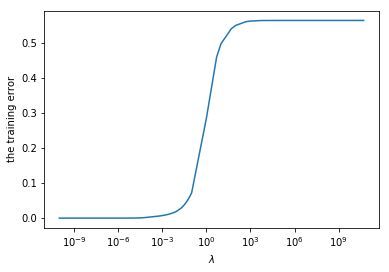

In [155]:
x_vector = np.mat(np.zeros([train_n, degree])) ## 10 * 11
weight = np.zeros([len(Lambda), degree])  ##  lambda* 11
for row in range(train_n):
    for col in range(degree):
        x_vector[row, col] = train_x[row] ** col  ## 10 * 11
        
for i in range(len(Lambda)):
    ##           11 * 10 - 10 * 11 + 11 * 11                            - 11 * 10  -   10* 1   =》 1 * 10
    weight[i] = ((x_vector.T * x_vector + Lambda[i] * np.eye(degree)).I * x_vector.T * np.mat(train_y).T).T
## 10 * 1  -  10*11 . 11 * Lambda - 10 * Labmda
train_err = np.mat(train_y).T - x_vector * weight.T 
train_err = np.array(np.power(train_err, 2).sum(0))[0]/train_n

plt.plot(Lambda, train_err) 
plt.xscale('log')
plt.xlabel("$\lambda$")
plt.ylabel('the training error')
plt.show()


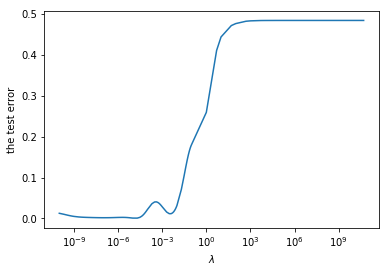

In [156]:
x_vector = np.mat(np.zeros([test_n, degree])) ## 100 * 11
# weight = np.zeros([len(Lambda), degree])  ##  lambda* 11
for i in range(test_n):
    for j in range(degree):
        x_vector[i, j] = test_x[i] ** j  ## 100 * 11
        
# for i in range(len(Lambda)):
#     ##           11 * 100 - 100 * 11 + 11 * 11                            - 11 * 100  -   100* 1   =》 1 * 100
#     weight[i] = ((x_vector.T * x_vector + Lambda[i] * np.eye(degree)).I * x_vector.T * np.mat(test_y).T).T
## 100 * 1  -  100*11 . 11 * Lambda - 100 * Labmda
test_err = np.mat(test_y).T - x_vector * weight.T 
test_err = np.array(np.power(test_err, 2).sum(0))[0]/test_n

plt.plot(Lambda, test_err) 
plt.xscale('log')
plt.xlabel("$\lambda$")
plt.ylabel('the test error')
plt.show()

In [157]:
index = 0
tmp = 10000
record = 0
for i in test_err:
    if(i<tmp):
        record = index
        tmp = i
    
    index+=1
    
print(record)

46


In [158]:
weight[46]

array([  1.01627465,  -0.56418714, -19.72813725,  18.93904357,
        16.20926299,   1.85320746,  -8.10691251, -10.49823301,
        -6.91976478,   0.1319753 ,   8.57418838])

In [159]:
Lambda[46]

2e-05

In [152]:
train_y

array([ 0.990896  ,  0.92515879,  0.92334204,  0.30444891, -0.38526738,
       -0.9032302 ,  0.31477683,  0.36218127,  0.96637666,  1.03147678])